**Celem badania jest analiza zbioru danych dotyczących rezerwacji lotów uzyskanych ze strony internetowej „Ease My Trip” oraz przeprowadzenie różnych testów hipotez statystycznych w celu uzyskania z nich znaczących informacji.**

**Algorytm statystyczny „regresji liniowej” zostałby wykorzystany do uczenia zbioru danych i przewidywania ciągłej zmiennej docelowej. „Easemytrip” to internetowa platforma do rezerwacji biletów lotniczych, a co za tym idzie platforma, za pomocą której potencjalni pasażerowie kupują bilety.**

**Dokładna analiza danych pomoże w odkryciu cennych spostrzeżeń, które będą miały ogromną wartość dla pasażerów.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Porzucamy 'Unnamed: 0' column bo nie jest ważna

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [5]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
categorical = df.select_dtypes(include = "object").columns
for i in categorical:
    print(df[categorical][i].value_counts())
    print('________________________________________')

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
________________________________________
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64
________________________________________
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
________________________________________
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
________________________________________
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
______________________________

# Analiza Danych

**Znany zakres cen**

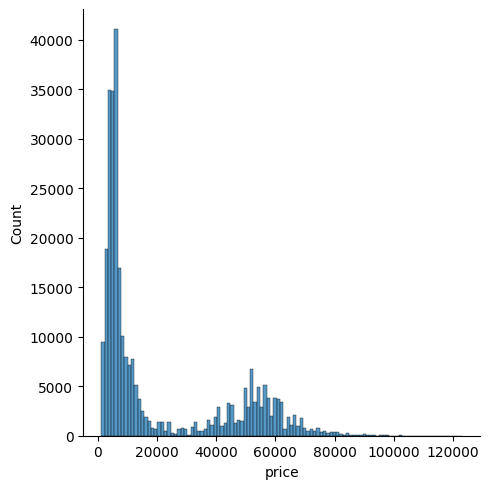

In [7]:
sns.displot(df['price'])

**Na tym wykresie stwierdzono korelację między linią lotniczą a ceną, wysoka cena w linii lotniczej Vistara, a następnie Air_India, a druga to ta sama cena**

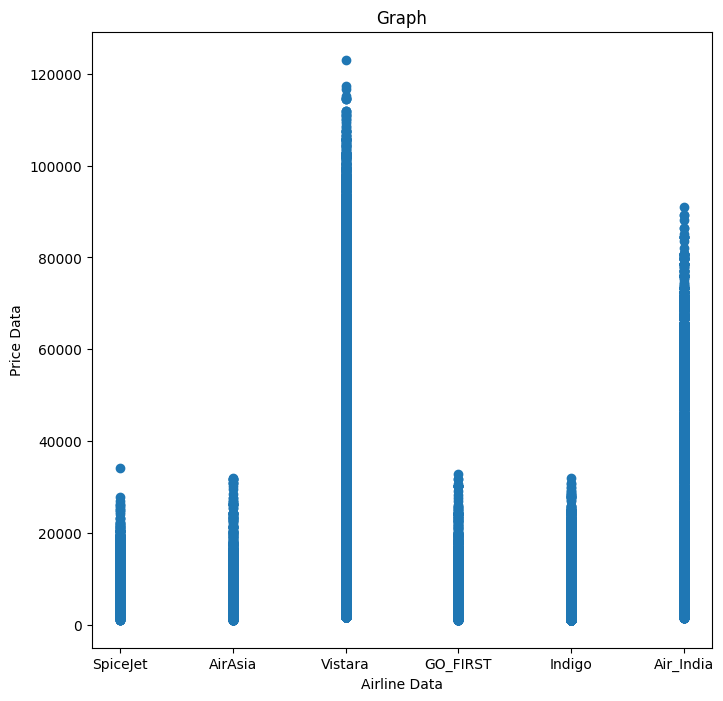

In [8]:
plt.figure(figsize = (8, 8))
plt.title('Graph')
plt.xlabel('Airline Data')
plt.ylabel('Price Data')
plt.scatter(df['airline'],df['price'])

**Jeśli chodzi o czas odlotu, późną nocą, cena jest niska**

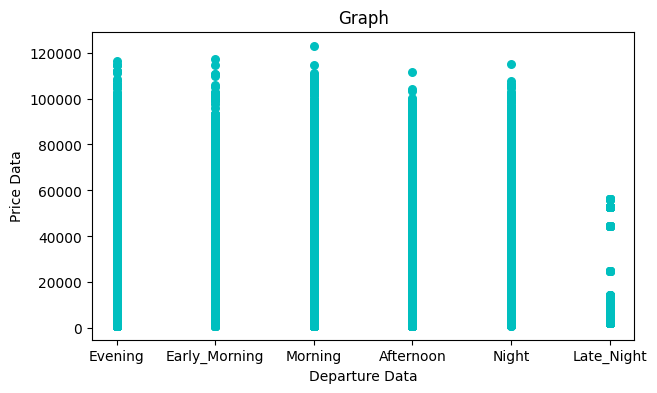

In [9]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Departure Data')
plt.ylabel('Price Data')

plt.scatter(df['departure_time'],df['price'],s=30,alpha=1,color= 'c')

**Jeśli chodzi o czas przylotu, późną nocą, cena jest nieco niska**

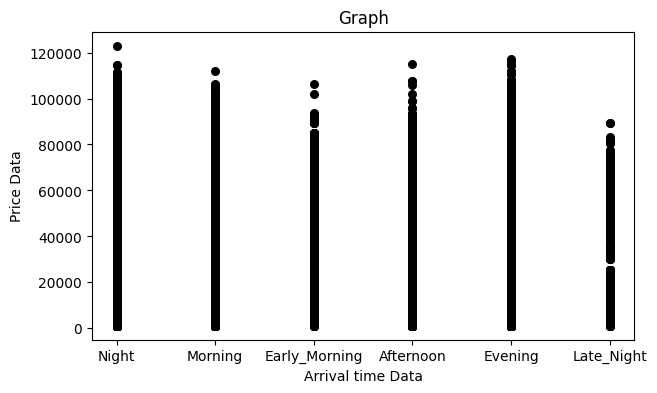

In [10]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Arrival time Data')
plt.ylabel('Price Data')

plt.scatter(df['arrival_time'],df['price'],s=30,alpha=1,color= 'k')

**W mieście wylotowym ceny są bardzo zbliżone do siebie**

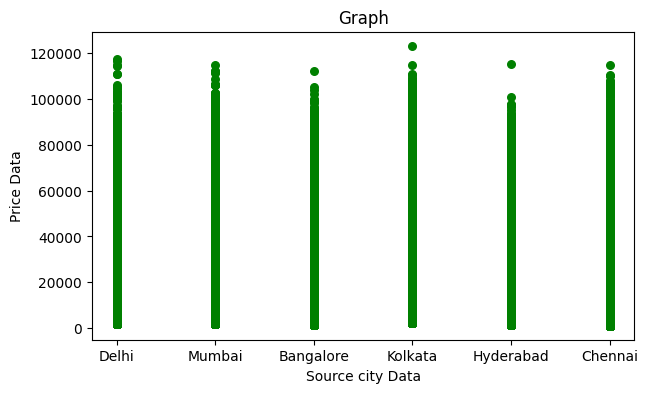

In [11]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Source city Data')
plt.ylabel('Price Data')

plt.scatter(df['source_city'],df['price'],s=30,alpha=1,color= 'g')

**W mieście docelowym ceny są do siebie przybliżone**

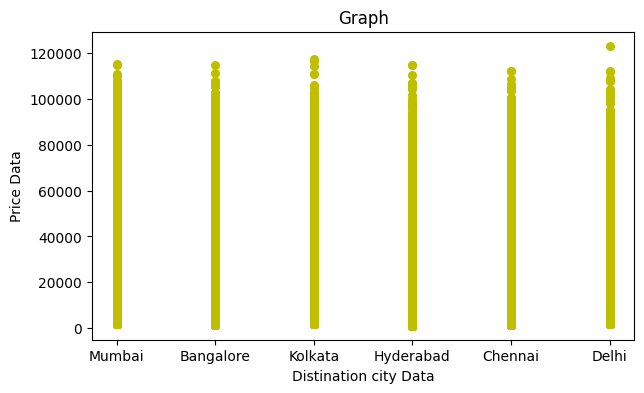

In [12]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Distination city Data')
plt.ylabel('Price Data')

plt.scatter(df['destination_city'],df['price'],s=30,alpha=1,color= 'y')

**Z przystankami, w zero, cena jest nieco niska**

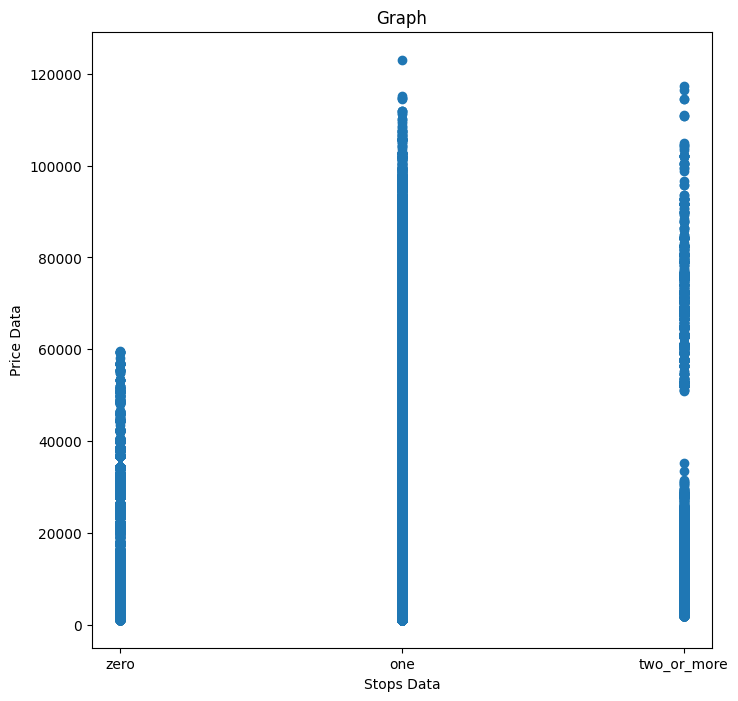

In [13]:
plt.figure(figsize = (8, 8))
plt.title('Graph')
plt.xlabel('Stops Data')
plt.ylabel('Price Data')

plt.scatter(df['stops'],df['price'])

* **W klasie ekonomicznej cena jest niska**
 * **W klasie biznes cena jest wysoka**


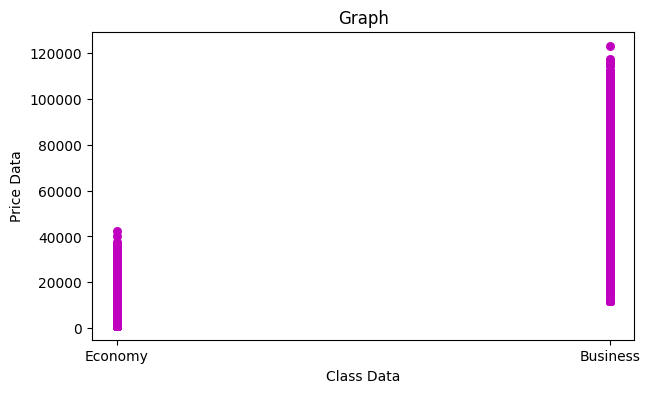

In [14]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Class Data')
plt.ylabel('Price Data')

plt.scatter(df['class'],df['price'],s=30,alpha=1,color= 'm')

In [15]:
airline={'SpiceJet':0, 'AirAsia':1, 'GO_FIRST':2, 'Indigo':3, 'Air_India':4, 'Vistara':5}
df['airline'] = df['airline'].replace(airline)

stop={'zero':0, 'two_or_more':1, 'one':2}
df['stops'] = df['stops'].replace(stop)

class_ = {'Economy':0, 'Business':1}
df['class'] = df['class'].replace(class_)

In [16]:
object_data = df.select_dtypes(include=['object'])
#to convert data of object type to numbers
encoder = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:, i] = encoder.fit_transform(object_data.iloc[:, i])

#concat between data none object and data object after convert it
num_data = df.select_dtypes(exclude=['object'])
df = pd.concat([object_data, num_data], axis=1)


**Korelacja między wszystkimi cechami**


<Axes: >

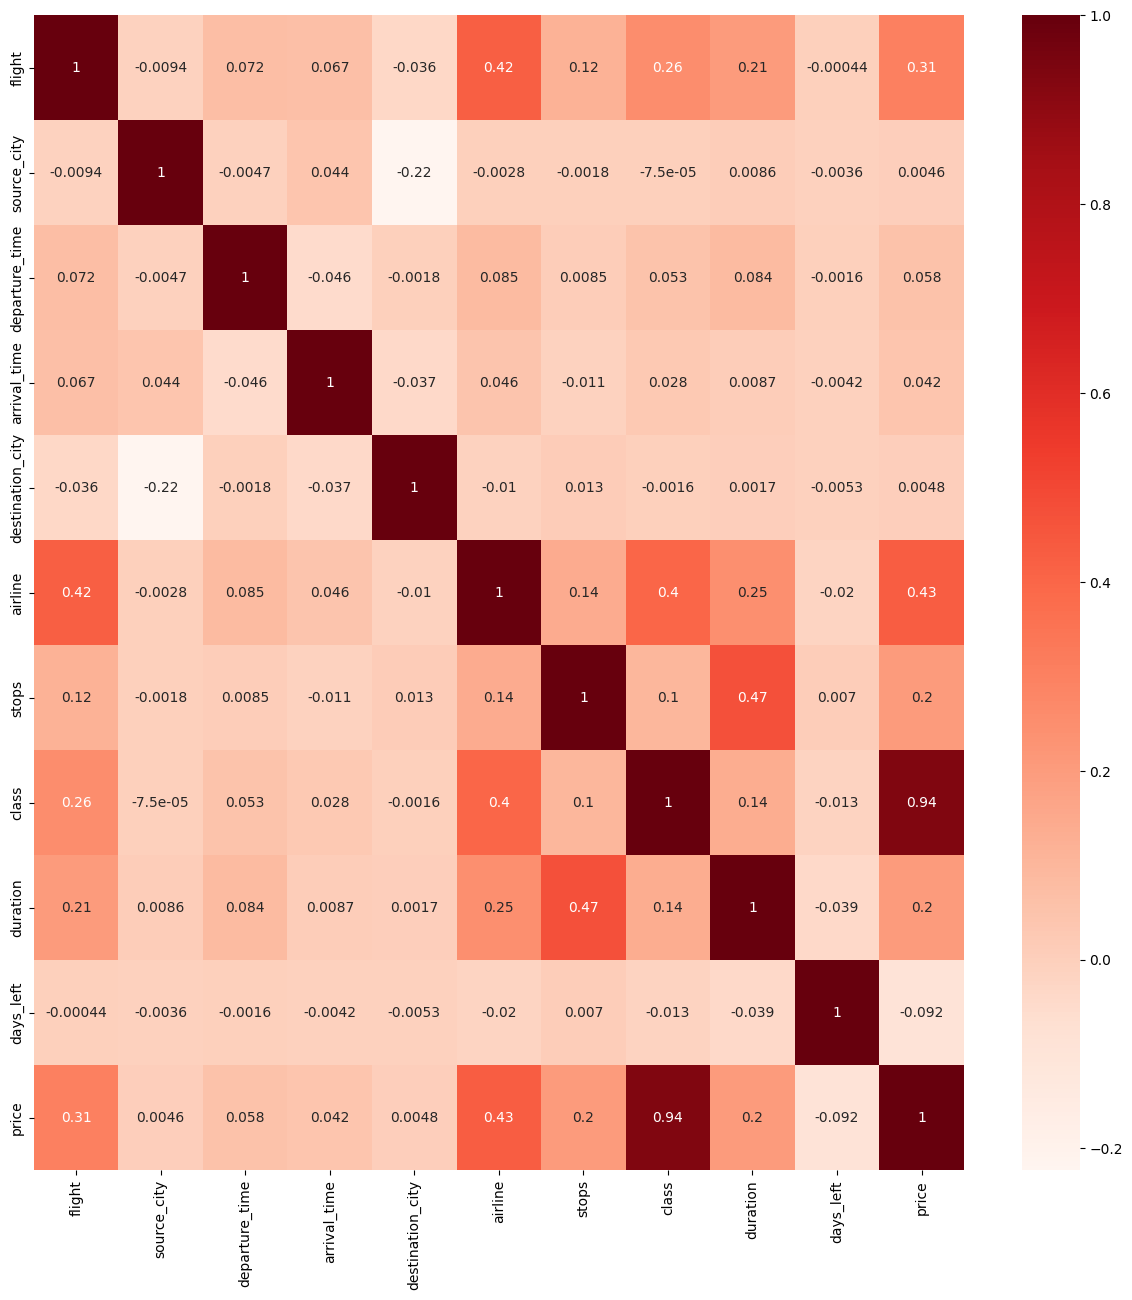

In [17]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


**Dzielenie danych**

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=44, shuffle =True)

**Model zwiększania gradientu**

In [19]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=12,learning_rate = 0.3 ,random_state=44)
GBRModel.fit(X_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9986473583306587
GBRModel Test Score is :  0.9918879321117378


In [20]:
y_pred = GBRModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='raw_values') 
print('Mean Squared Error Value is : ', np.sqrt(MSEValue))

Mean Squared Error Value is :  [2043.03287716]
